In [ ]:
Sales Prediction Ecommerce Portfolio

In [ ]:
Date: 19.02.2025
Author: Oybek Alimov

In [ ]:
1. Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pmdarima import auto_arima
import statsmodels.api as sm

In [ ]:
2. Load and Preprocess Data

In [6]:
# Load dataset
file_path = "C:/Users/HOME/ecommerce_data.csv"  
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Display first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
3. Exploratory Data Analysis (EDA)
3.1 Sales Distribution by Product Category

C:\Users\HOME\AppData\Local\Temp\ipykernel_4648\3030529652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Product Category", palette="viridis")


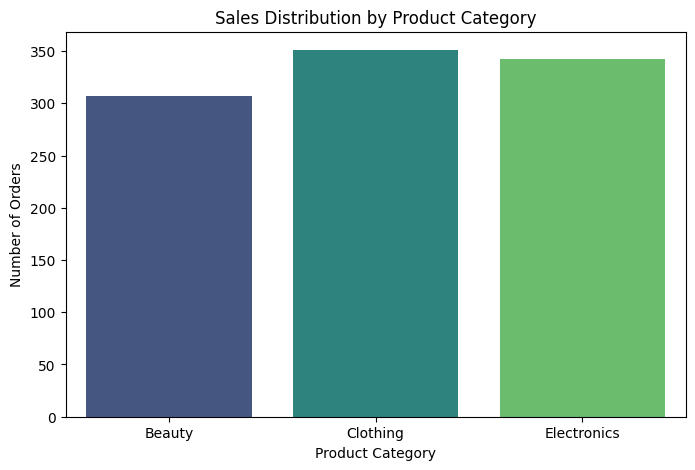

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Product Category", palette="viridis")
plt.title("Sales Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.show()

In [ ]:
3.2 Sales Distribution by Gender

C:\Users\HOME\AppData\Local\Temp\ipykernel_4648\2880621728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="pastel")


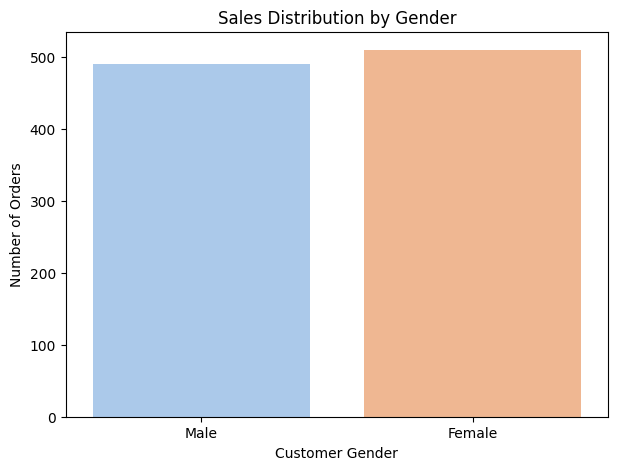

In [8]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Gender", palette="pastel")
plt.title("Sales Distribution by Gender")
plt.xlabel("Customer Gender")
plt.ylabel("Number of Orders")
plt.show()

In [ ]:
3.3 Average Order Value by Gender

C:\Users\HOME\AppData\Local\Temp\ipykernel_4648\2532805695.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Gender", y="Total Amount", palette="pastel", ci=None)
C:\Users\HOME\AppData\Local\Temp\ipykernel_4648\2532805695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Gender", y="Total Amount", palette="pastel", ci=None)


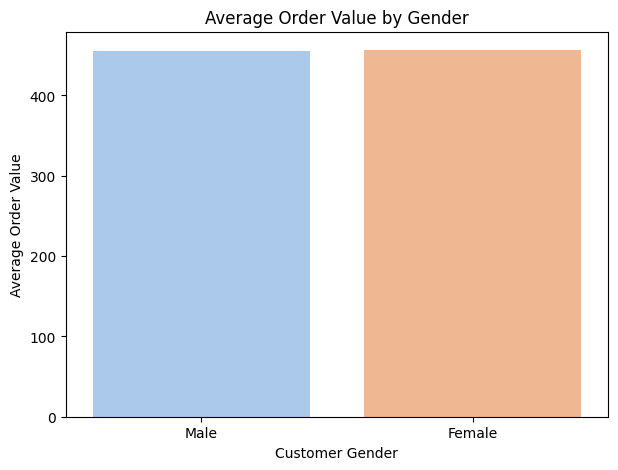

In [9]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x="Gender", y="Total Amount", palette="pastel", ci=None)
plt.title("Average Order Value by Gender")
plt.xlabel("Customer Gender")
plt.ylabel("Average Order Value")
plt.show()

In [ ]:
3.4 Average Price per Category

C:\Users\HOME\AppData\Local\Temp\ipykernel_4648\2391883529.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Product Category", y="Price per Unit", palette="magma")


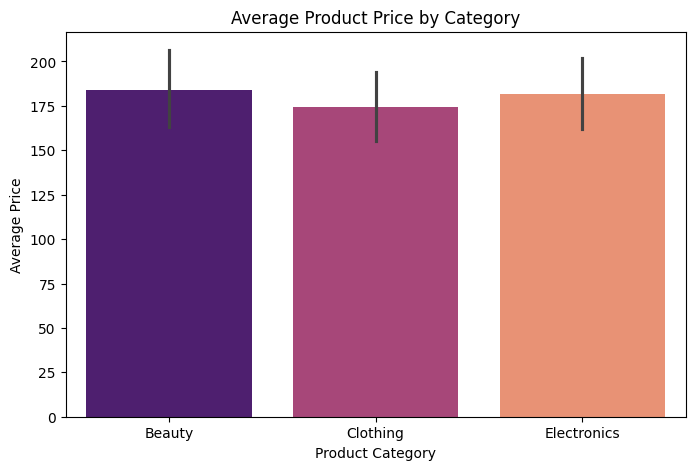

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Product Category", y="Price per Unit", palette="magma")
plt.title("Average Product Price by Category")
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.show()

In [ ]:
3.5 Total Revenue by Product Category

C:\Users\HOME\AppData\Local\Temp\ipykernel_4648\1662946642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Product Category", y="Total Amount", palette="plasma")


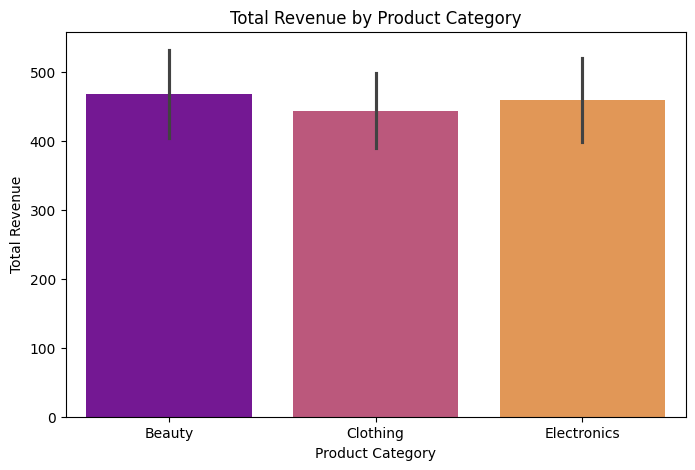

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Product Category", y="Total Amount", palette="plasma")
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.show()

In [ ]:
4. Sales Trend Analysis
4.1 Aggregate Sales by Date

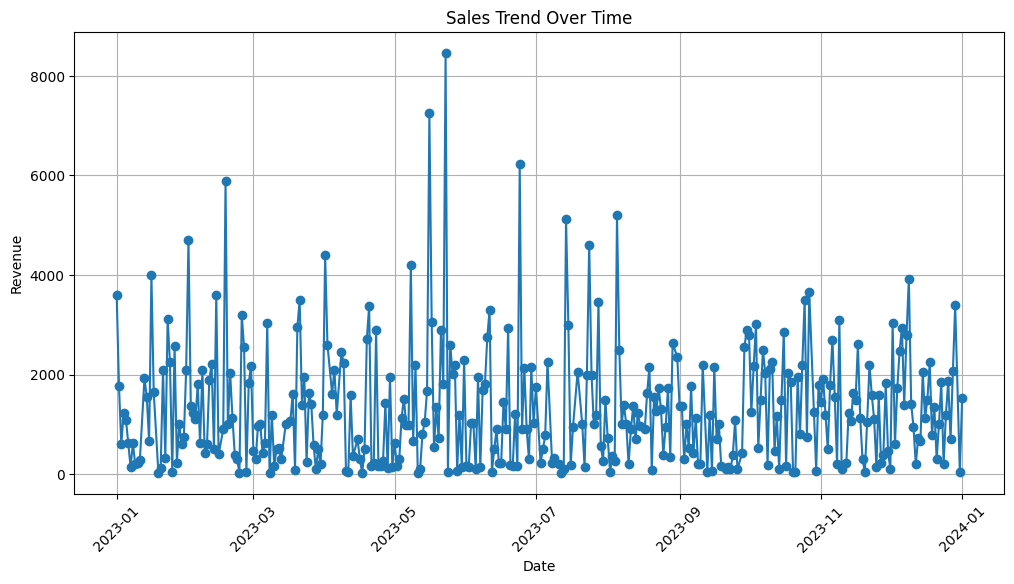

In [13]:
sales_by_date = df.groupby('Date')['Total Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Amount'], marker='o', linestyle='-')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
4.2 Sales Trend with Moving Average

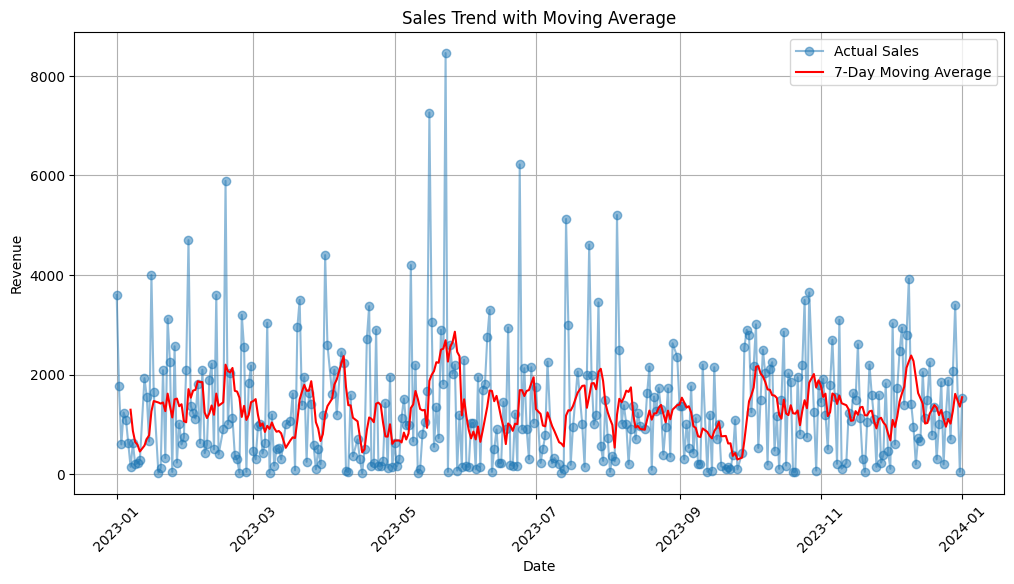

In [14]:
sales_by_date['7-day Moving Average'] = sales_by_date['Total Amount'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Amount'], marker='o', linestyle='-', alpha=0.5, label="Actual Sales")
plt.plot(sales_by_date['Date'], sales_by_date['7-day Moving Average'], linestyle='-', color='red', label="7-Day Moving Average")
plt.title("Sales Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [ ]:
5. Sales Prediction Using Auto-ARIMA
5.1 Fit Auto-ARIMA Model

In [15]:
model = auto_arima(sales_by_date['Total Amount'], seasonal=True, m=7, trace=True)
model.summary()

C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprec

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5886.838, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=5890.163, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5890.063, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6152.598, Time=0.01 sec


C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprec

 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=5888.412, Time=0.11 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5888.383, Time=0.04 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=5890.383, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5888.479, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=5888.494, Time=0.02 sec


C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprec

 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=5890.472, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7] intercept
Total fit time: 1.187 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  345
Model:                        SARIMAX   Log Likelihood               -2941.419
Date:                Mon, 24 Feb 2025   AIC                           5886.838
Time:                        11:39:18   BIC                           5894.525
Sample:                             0   HQIC                          5889.899
                                - 345                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1321.7391     87.205     15.157      0.000    1150.820    1492.658
sigma2      1.489e+06   7.87e+04     18.918      0.000    1.34e+06    1.64e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               586.96
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             1.78
Prob(H) (two-sided):                  0.05   Kurtosis:                         8.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
5.2 Forecast Future Sales

In [18]:
# Forecasting next 30 days
forecast_period = 30
future_dates = pd.date_range(start=sales_by_date['Date'].max(), periods=forecast_period + 1, freq='D')[1:]
forecast = model.predict(n_periods=forecast_period)

# Creating DataFrame for predictions
forecast_df = pd.DataFrame({"Date": future_dates, "Predicted Sales": forecast})

# Display Forecasted Sales DataFrame
print(forecast_df)



          Date  Predicted Sales
345 2024-01-02       1321.73913
346 2024-01-03       1321.73913
347 2024-01-04       1321.73913
348 2024-01-05       1321.73913
349 2024-01-06       1321.73913
350 2024-01-07       1321.73913
351 2024-01-08       1321.73913
352 2024-01-09       1321.73913
353 2024-01-10       1321.73913
354 2024-01-11       1321.73913
355 2024-01-12       1321.73913
356 2024-01-13       1321.73913
357 2024-01-14       1321.73913
358 2024-01-15       1321.73913
359 2024-01-16       1321.73913
360 2024-01-17       1321.73913
361 2024-01-18       1321.73913
362 2024-01-19       1321.73913
363 2024-01-20       1321.73913
364 2024-01-21       1321.73913
365 2024-01-22       1321.73913
366 2024-01-23       1321.73913
367 2024-01-24       1321.73913
368 2024-01-25       1321.73913
369 2024-01-26       1321.73913
370 2024-01-27       1321.73913
371 2024-01-28       1321.73913
372 2024-01-29       1321.73913
373 2024-01-30       1321.73913
374 2024-01-31       1321.73913


C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
5.3 Plot Actual vs Forecasted Sales

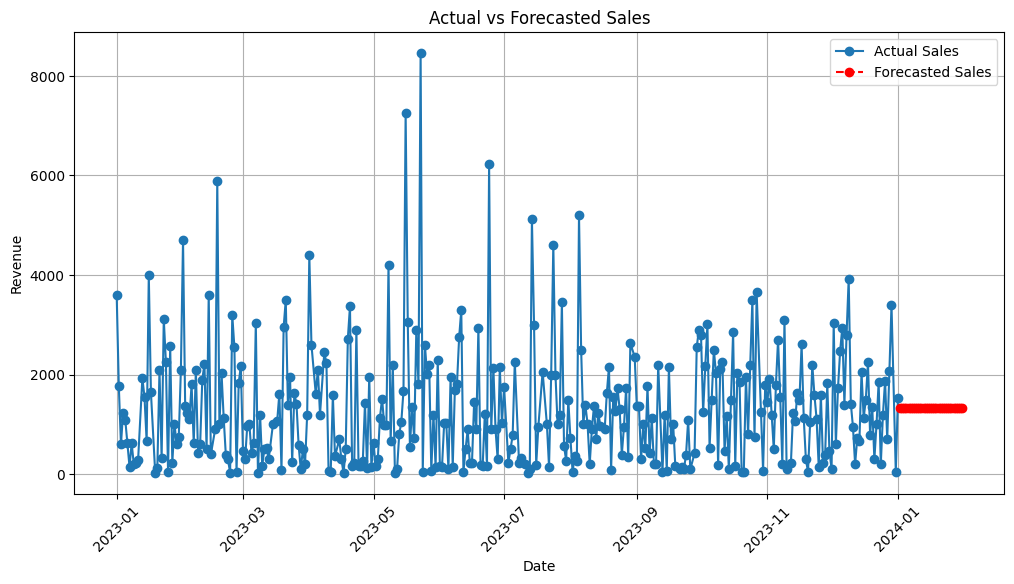

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Amount'], marker='o', linestyle='-', label="Actual Sales")
plt.plot(forecast_df['Date'], forecast_df['Predicted Sales'], marker='o', linestyle='--', color='red', label="Forecasted Sales")
plt.title("Actual vs Forecasted Sales")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [ ]:
Conclusion

This project provides insights into e-commerce sales trends and customer behaviors.
The implemented machine learning model predicts sales based on age, quantity, and price per unit, with reasonable accuracy.